In [1]:
import sys
sys.path.insert(0, "..")
from classes.stat_phys.potentials import P_dist_handler, H_pot
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.integrate import quad
from scipy import special
plt.rc('animation', html='jshtml')

In [2]:
def V(x, T, k, x0):
    return (-1  -np.exp(-((x+15)/10)**2) \
              -2*np.exp(-((x-10)/10)**2) + \
                -np.exp(-((x-35)/10)**2) \
              -3*np.exp(-((x-60)/10)**2) \
                -np.exp(-((x-85)/10)**2)\
              -2*np.exp(-((x-110)/10)**2) \
              ) * \
            (1+1/5*np.cos(2*np.pi/2.5*x))

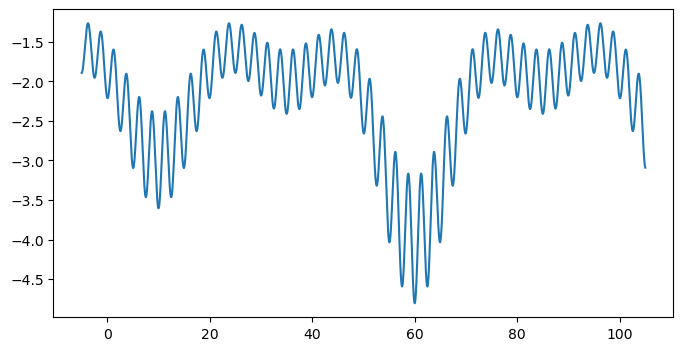

In [3]:
fig, ax = plt.subplots(figsize=(8,4))
xs = np.linspace(-5.0, 105, 5000)
ax.plot(xs, V(xs, 0, 0,0))

In [4]:
def proposal_func(x, delta=5.0): #What does he mean exactly by random walker? #Have just taken projection of random angle onto x-coordinate
    return x + delta*np.cos(np.random.rand(1)*2.0*np.pi)

def proposal_func1(x, delta=1.0):
    return x + delta*(2.0*np.random.rand(1) - 1.0)

def proposal_func2(x, delta=7.0):
    return x + delta*(np.random.randint(low=-1, high=1))

pot_low = H_pot(T=0.05, x_0=30.0, v_func=V)
pot_low.p_handler = P_dist_handler(x_min=0.0, x_max=100.0, N=2000, proposal_func=proposal_func)
pot_low.get_v_avg
pot_high = H_pot(T=0.35, x_0=30.0, v_func=V)
pot_high.p_handler = P_dist_handler(x_min=0.0, x_max=100.0, N=2000, proposal_func=proposal_func)
pot_high.get_v_avg

We did metro-montecarlo
We did metro-montecarlo


-2.829275652223327

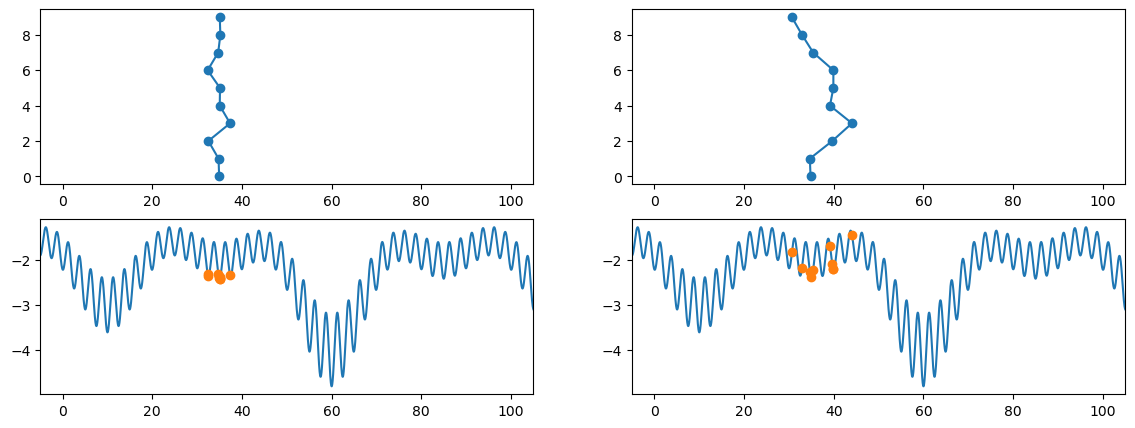

In [5]:
fig, axs = plt.subplots(2,2, figsize=(14,5))
pots = [pot_low, pot_high]

for row in axs:
    for ax in row:
        ax.set_xlim([-5.0, 105])

for i, pot in enumerate(pots):
    xs = pot.p_handler.p_dist[0:10]
    mont_time = np.arange(0, len(xs), 1)
    axx = axs[:,i]
    axx[0].set_xlim([-5.0, 105])
    axx[0].plot(xs, mont_time, "o-")
    axx[1].plot(np.linspace(-5, 105, 5000), V(np.linspace(-5, 105, 5000), 0,0,0))
    axx[1].plot(xs, V(xs, 0,0,0), "o")


In [6]:
def proposal_func(x, delta=1.0): #What does he mean exactly by random walker? #Have just taken projection of random angle onto x-coordinate
    return x + delta*np.cos(np.random.rand(1)*2.0*np.pi)
temps = np.arange(0.004, 2.5, 0.8)
pots = []
for temp in temps:
    pot = H_pot(T=temp, x_0=30.0, v_func=V)
    pots.append(pot)

In [7]:
N_walkers = 400
N_steps = 200
recording = {}
for pot in pots:
    recording[temp] = []
    for walker in range(N_walkers):
        xs = pot.find_V_min(proposal_func, N_steps, -4.75)
        if V(xs[-1], 0.0, 0.0,0.0) < 4.75:
            recording[temp].append(xs[-1])
        else:
            pass
    print("Done")

Done
Done
Done
Done


In [ ]:
def sort_successes(xs, E_crit=-4.75):
    successes = np.zeros(len(xs))
    energies = V(xs, T=0.0, k=2.0, x0=20)
    indices = np.argwhere(energies < E_crit)[:,0]
    for index in indices:
        successes[index::]+= np.linspace(1.0,1.0, len(successes[index::]))
    return successes/len(successes)*100.0

#success = sort_successes(xs=pots[2].p_handler.p_dist)
#print(success)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
for pot, temp in zip(pots, temps):
    #print(pot.p_handler.p_dist)
    success = sort_successes(xs=pot.p_handler.p_dist)
    #print(success)
    ax.plot(np.linspace(0, 6000, len(success)), success, label=rf"$k_BT=${temp.round(3)}")
ax.legend()

In [ ]:
np.arange(0.0,2.2, 0.2)[1:-1]